# **Proyecto final Introducción a los Sistemas Inteligentes**

**Presentado por:**

*   Maria Camila Amaya Rodríguez
*   Sergio Andrés Castro Vargas
*   Juan David Rodríguez Gómez

**Presentado a:**

*   Fabio Augusto Gonzalez Osorio
    *   fagonzalezo@unal.edu.co

**Información del Curso:**

*   **Universidad:** Universidad Nacional de Colombia
*   **Asignatura:** Introducción a los Sistemas Inteligentes
*   **Semestre:** 2025-2
*   **Fecha:** 12 de diciembre de 2025

# A. Descripción del Problema

El objetivo de este proyecto es desarrollar un modelo de *machine learning* capaz de **cuantificar la celularidad tumoral** en imágenes histológicas de cáncer de mama. La celularidad tumoral describe el porcentaje de área ocupada por células cancerígenas dentro de un tejido y es un parámetro clave para evaluar la respuesta del tumor a tratamientos neoadyuvantes.

Este trabajo se desarrolla en el marco del **SPIE–AAPM–NCI BreastPathQ: Cancer Cellularity Challenge 2019**, un concurso internacional que busca comparar métodos automatizados para estimar la celularidad a partir de *whole slide images* (WSI) teñidas con hematoxilina y eosina (H&E). Estas diapositivas son extremadamente grandes, por lo que el challenge proporciona **patches histológicos** extraídos de dichas imágenes para facilitar el análisis.

La estimación de la celularidad en el momento del contest era realizada manualmente por patólogos expertos, un proceso que presenta varios problemas:

- Es **lento** y consume mucho tiempo.
- Es **subjetivo**, dependiendo del criterio del especialista.
- Presenta **variabilidad inter e intra-observador**.
- Es difícil de estandarizar en entornos clínicos.

Por ello, los modelos basados en aprendizaje profundo tienen el potencial de **mejorar la reproducibilidad**, **reducir la carga de trabajo**, y **aumentar la precisión diagnóstica**.

En este proyecto, nuestro sistema deberá:
- Procesar parches histológicos en formato `.tif`
- Extraer características visuales relevantes
- Predecir un puntaje continuo de celularidad
- Evaluarse con métricas definidas por el challenge (**PK**)
- Generar predicciones listas para enviar a la plataforma de evaluación


## 🧬 ¿Qué es la Celularidad Tumoral y Qué Detecta el Modelo?

La **celularidad tumoral** se refiere al **porcentaje del área de un tejido ocupado por células cancerosas**, un parámetro fundamental en patología para evaluar el grado de infiltración tumoral y la respuesta al tratamiento neoadyuvante. Esta métrica se obtiene a partir del análisis de imágenes histológicas teñidas con hematoxilina y eosina (H&E), la coloración estándar en patología diagnóstica.

En tinción H&E:  
- La **hematoxilina** tiñe los núcleos celulares en tonos azul oscuro o púrpura.  
- La **eosina** tiñe el citoplasma, colágeno y matriz extracelular en tonos rosados.  

(**Fuente:** Kiernan JA. *Histological and Histochemical Methods*, 5th edition. 2015.)

###  ¿Cómo evalúan los patólogos la celularidad?

Los patólogos estiman la celularidad observando:

1. **Densidad nuclear**  
   Las células cancerosas presentan típicamente:
   - Núcleos aumentados de tamaño  
   - Hipercromasia (coloración nuclear intensa)  
   - Irregularidades en la membrana nuclear  
   - Pleomorfismo (variabilidad en forma y tamaño)  


2. **Relación entre tejido tumoral y estroma sano**  
   El modelo debe diferenciar:
   - Tejido tumoral  
   - Estroma fibroso  
   - Grasa  
   - Zonas necróticas  
   - Células inflamatorias no malignas  


3. **Distribución espacial del tumor**  
   La celularidad no sólo depende del número de células malignas, sino también de su **distribución en el parche histológico**, lo cual complica la evaluación manual.

4. **Puntaje de celularidad**  
   La métrica final suele representarse como un valor continuo:
   - **0.0** → tejido sin tumor  
   - **1.0** → área completamente ocupada por tumor  

---

## Conexión con el Aprendizaje Automático

El problema se trata como una **regresión supervisada**, donde:

- **Entrada:** una imagen histológica en formato `.tif`
- **Salida:** un valor continuo de celularidad tumoral
- **Etiquetas:** generadas por patólogos expertos mediante protocolos de evaluación de respuesta terapéutica

Modelos basados en **Convolutional Neural Networks (CNNs)** o **Vision Transformers (ViTs)** pueden aprender patrones visuales asociados a malignidad, como:

- textura nuclear  
- variación morfológica  
- densidad celular  
- grado de diferenciación  




##  Definición de términos técnicos clave

En esta sección agrupamos los conceptos fundamentales que utilizaremos en el proyecto:

| Término                        | Descripción breve                                                                                           |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------- |
| Hematoxilina y Eosina (H&E)    | Tinción estándar en patología: hematoxilina tiñe núcleos (azul/púrpura) y eosina tiñe citoplasma/estroma (rosa). |
| Celularidad tumoral            | Porcentaje del área del tejido ocupada por células cancerosas en una imagen histológica.                      |
| Pleomorfismo                   | Variabilidad en forma y tamaño de los núcleos tumorales; indicador de malignidad.                            |
| PK (Pairwise Ranking Kappa)    | Métrica del challenge: mide si el modelo respeta el **orden relativo** entre parches según su celularidad.   |
| Patch                          | Recorte pequeño extraído de una Whole Slide Image (WSI) para análisis.                                        |
| WSI (Whole Slide Image)        | Imagen digital extremadamente grande generada al escanear una lámina histológica completa.                    |
| CNN (Convolutional Neural Net) | Arquitectura que aprende patrones visuales (textura, bordes, núcleos) mediante convoluciones.                 |
| Vision Transformer (ViT)       | Modelo basado en mecanismos de atención para capturar relaciones globales en la imagen.                       |
| Normalización                  | Escalamiento de valores de píxeles para estabilizar el entrenamiento (p. ej., dividir por 255).               |
| Data augmentation              | Transformaciones aleatorias para mejorar generalización (rotación, flip, crop).                              |
| Learning rate (LR)             | Tamaño del paso que da el optimizador al actualizar los pesos en cada iteración.                              |
| Epoch                          | Un recorrido completo sobre todo el conjunto de entrenamiento.                                                 |
| Batch size                     | Número de imágenes procesadas antes de actualizar los pesos.                                                   |
| Overfitting                    | Cuando el modelo memoriza el entrenamiento y generaliza mal en validación.                                    |
| Transfer learning              | Método donde se aprovechan pesos preentrenados (ImageNet) para acelerar y mejorar el entrenamiento.           |
| Scheduler                      | Estrategia que ajusta dinámicamente el learning rate durante el entrenamiento.                                  |


# B. Importación de datos

In [2]:
#Acá iran todas las librería a importar cuando se entrene el modelo
#Por el momento solo deje las de preprocesar las imagenes
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
#De pronto toca modificarlo cuando se la enviemos al monitor
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = './breastpathq/datasets'

In [5]:
# Subcarpetas del dataset
cells_dir = os.path.join(base_path, 'cells')
train_dir = os.path.join(base_path, 'train')
val_dir   = os.path.join(base_path, 'validation')
labels_csv = os.path.join(base_path, 'train_labels.csv')


In [9]:
# Parámetros de la imagen
img_size = (224, 224) # Tamaño para modelo (ajustar al requerido por el modelo)
batch_size = 32 # Ajustar dependiendo de la memoria de la GPU

#Cargar el dataframe
train_df = pd.read_csv(labels_csv)

# Formatear el nombre de las imagenes de entrenamiento
train_df['filename'] = train_df['slide'].astype(str) + '_' + train_df['rid'].astype(str) + '.tif'

# Primeras filas para verificar
print("Training DataFrame head:")
display(train_df.head())

import os

files = os.listdir(train_dir)
print("Total images in train folder:", len(files))
print(files[:15])


# Inicializar ImageDataGenerator para normalizar los datos
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Valores de los pixeles[0,1]
    rotation_range=20,              # Rotar las imagenes hasta 20 grados(revisable)
    width_shift_range=0.2,          # Girar horizontalmente al azar (revisable)
    height_shift_range=0.2,         # Girar verticalmente al azar (revisable)
    shear_range=0.2,                # Cortar la imagen (revisable)
    zoom_range=0.2,                 # Zoom al azar (revisable)
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'             # Llenar pixeles (revisable)
)

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,              # Path a la carpeta
    x_col='filename',                 # Filename
    y_col='y',                        # labels
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=True
)

print(f"\nFound {train_generator.samples} training images.")

Training DataFrame head:


slide  rid     y     filename
0  99861    1  0.40  99861_1.tif
1  99861    2  0.40  99861_2.tif
2  99861    3  0.15  99861_3.tif
3  99861    4  0.10  99861_4.tif
4  99861    5  0.07  99861_5.tif

Total images in train folder: 2394
['99788_1.tif', '99788_10.tif', '99788_11.tif', '99788_12.tif', '99788_13.tif', '99788_14.tif', '99788_15.tif', '99788_16.tif', '99788_17.tif', '99788_18.tif', '99788_19.tif', '99788_2.tif', '99788_20.tif', '99788_21.tif', '99788_22.tif']
Found 2394 validated image filenames.

Found 2394 training images.


# C. Exploración de datos

Displaying the first normalized image for the first 5 unique slides:


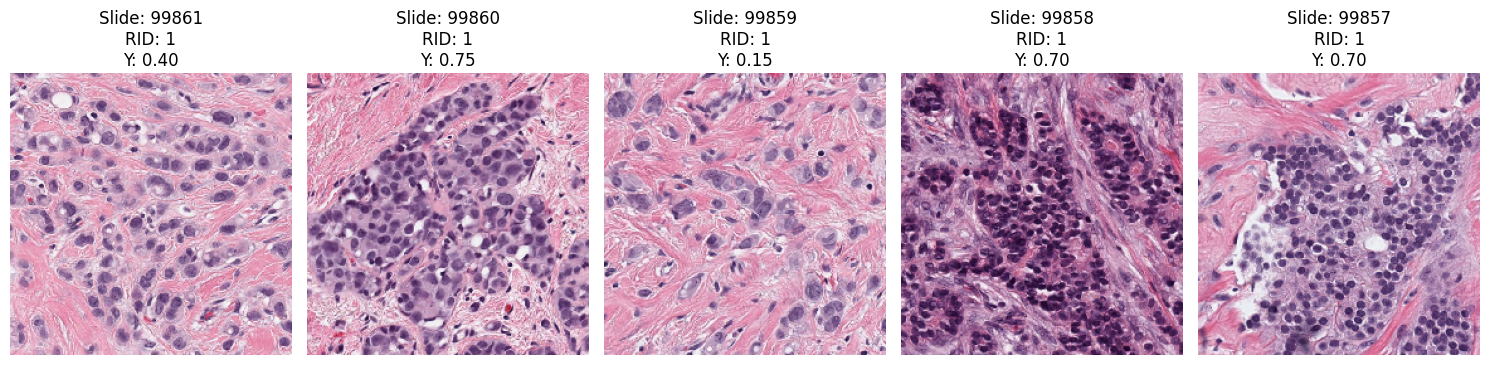

In [10]:


# Obtener cada slide único
unique_slides = train_df['slide'].unique()

# Primeros 5 únicos
slides_to_display = unique_slides[:5]

plt.figure(figsize=(15, 5))

print("Displaying the first normalized image for the first 5 unique slides:")

for i, slide_id in enumerate(slides_to_display):
    # Busca la primera entrada para este slide_id (suponiendo que 'rid' empieza en 1) y construye el path a las imagenes

    first_image_row = train_df[train_df['slide'] == slide_id].iloc[0]
    image_filename = first_image_row['filename']

    image_path = os.path.join(train_dir, image_filename)

    # Carga la imagen
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)

    # Reescalamos la imagen
    normalized_img_array = img_array / 255.0

    # Mostrar la imagen
    plt.subplot(1, 5, i + 1) # 1 row, 5 columns, current image index
    plt.imshow(normalized_img_array)
    plt.title(f"Slide: {slide_id}\nRID: {first_image_row['rid']}\nY: {first_image_row['y']:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Revisar Estructura General del Dataset

Determinar la cantidad total de imágenes, la cantidad de parches por slide y confirmar el patrón de nombres de archivos. Se validará si hay imágenes corruptas, aunque el ImageDataGenerator ya maneja esto.


In [11]:
print(f"Total de iamgenes: {len(train_df)}\n")

# Calcular parches por slide
patches_per_slide = train_df.groupby('slide')['rid'].count()
print("Estadísticas por slide:")
print(patches_per_slide.describe())

print("\nPrimeras 5 filas:")
display(train_df.head())

Total de iamgenes: 2394

Estadísticas por slide:
count    63.000000
mean     38.000000
std      15.963668
min       4.000000
25%      29.500000
50%      34.000000
75%      45.000000
max      77.000000
Name: rid, dtype: float64

Primeras 5 filas:


slide  rid     y     filename
0  99861    1  0.40  99861_1.tif
1  99861    2  0.40  99861_2.tif
2  99861    3  0.15  99861_3.tif
3  99861    4  0.10  99861_4.tif
4  99861    5  0.07  99861_5.tif

## Visualizar Distribución de la Variable Objetivo (Celularidad)

Generamos un histograma y un boxplot de la variable 'y' (celularidad tumoral) y calculamos sus percentiles (0, 25, 50, 75, 100) para entender su distribución.


Percentiles de celularidad del tumor ('y'):
0.00    0.0
0.25    0.0
0.50    0.2
0.75    0.5
1.00    1.0
Name: y, dtype: float64


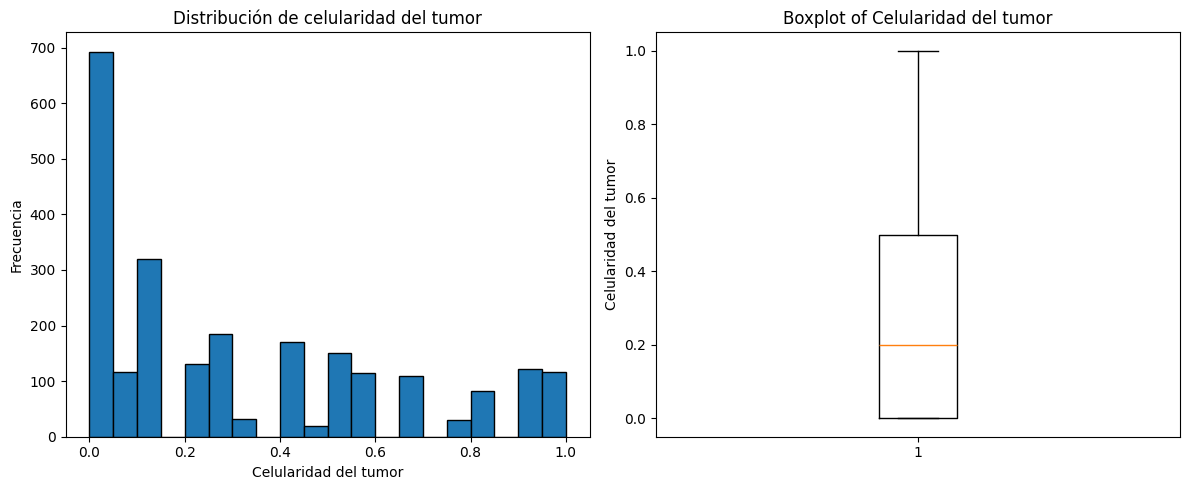

In [12]:
print("Percentiles de celularidad del tumor ('y'):")
print(train_df['y'].quantile([0.0, 0.25, 0.5, 0.75, 1.0]))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['y'], bins=20, edgecolor='black')
plt.title('Distribución de celularidad del tumor')
plt.xlabel('Celularidad del tumor')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(train_df['y'])
plt.title('Boxplot of Celularidad del tumor')
plt.ylabel('Celularidad del tumor')

plt.tight_layout()
plt.show()

## Mostrar Ejemplos de Imágenes Normalizadas


A continuación 4 imágenes con alta celularidad, 4 imágenes con baja celularidad y 4 imágenes seleccionadas aleatoriamente para comprender visualmente el problema y justificar el enfoque de Deep Learning.


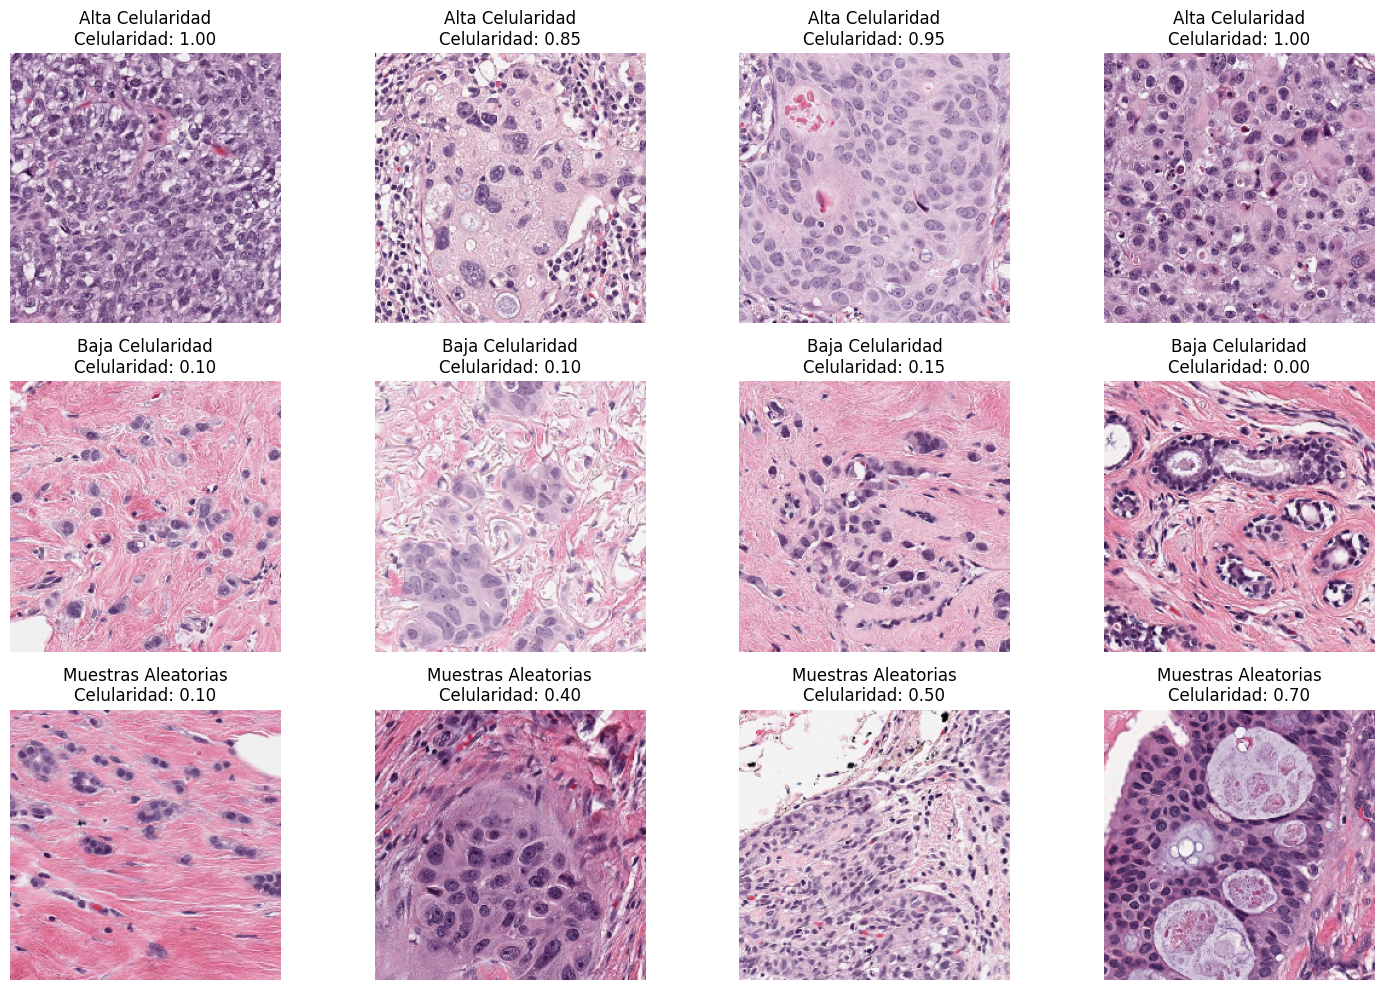

In [13]:
num_images_to_display = 4  # Mostrar 4 imágenes por categoría

# ----- Filtrar imágenes con alta celularidad (y > 0.75) -----
high_cellularity_df = train_df[train_df['y'] > 0.75].sample(
    n=min(num_images_to_display, len(train_df[train_df['y'] > 0.75])),
    random_state=42
)

# ----- Filtrar imágenes con baja celularidad (y < 0.25) -----
low_cellularity_df = train_df[train_df['y'] < 0.25].sample(
    n=min(num_images_to_display, len(train_df[train_df['y'] < 0.25])),
    random_state=42
)

# ----- Tomar muestras aleatorias del dataset completo -----
random_cellularity_df = train_df.sample(
    n=num_images_to_display,
    random_state=42
)

plt.figure(figsize=(15, 10))

# ----- Diccionario con las categorías a mostrar -----
image_dfs = {
    "Alta Celularidad": high_cellularity_df,
    "Baja Celularidad": low_cellularity_df,
    "Muestras Aleatorias": random_cellularity_df
}

plot_index = 1

# ----- Graficar imágenes -----
for categoria, df_subset in image_dfs.items():
    for i, row in df_subset.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(train_dir, image_filename)
        cellularity_value = row['y']

        img = load_img(image_path, target_size=img_size)
        img_array = img_to_array(img)
        normalized_img_array = img_array / 255.0  # Normalización simple para visualización

        plt.subplot(len(image_dfs), num_images_to_display, plot_index)
        plt.imshow(normalized_img_array)
        plt.title(f"{categoria}\nCelularidad: {cellularity_value:.2f}")
        plt.axis('off')
        plot_index += 1

plt.tight_layout()
plt.show()


## Analizar Correlaciones y Tendencias por Slide

Exploramos si algunos slides tienen más cáncer que otros (promedio de 'y' por slide) y si 'rid' tiene alguna correlación con 'y' dentro de los slides.


Top 5 slides con mayor celularidad promedio:
slide
99792    0.586111
99789    0.581515
99795    0.575714
99788    0.573226
99846    0.567500
Name: y, dtype: float64

Top 5 slides con menor celularidad promedio:
slide
99860    0.064848
99808    0.053125
99800    0.051000
99825    0.045139
99802    0.000000
Name: y, dtype: float64


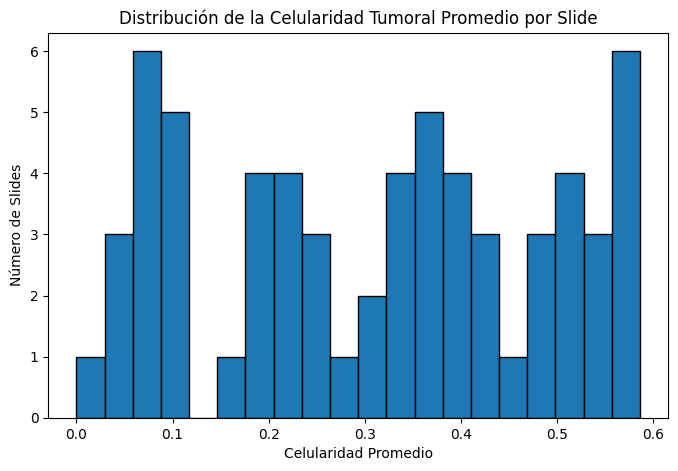

In [14]:
# ----- Calcular la celularidad promedio por slide -----
average_cellularity_per_slide = train_df.groupby('slide')['y'].mean().sort_values(ascending=False)

print("Top 5 slides con mayor celularidad promedio:")
print(average_cellularity_per_slide.head())

print("\nTop 5 slides con menor celularidad promedio:")
print(average_cellularity_per_slide.tail())

# ----- Histograma de la distribución de celularidad promedio por slide -----
plt.figure(figsize=(8, 5))
plt.hist(average_cellularity_per_slide, bins=20, edgecolor='black')
plt.title('Distribución de la Celularidad Tumoral Promedio por Slide')
plt.xlabel('Celularidad Promedio')
plt.ylabel('Número de Slides')
plt.show()


## Confirmar Forma, Resolución y Canales de Imágenes

Inspeccionamos las dimensiones (forma, resolución y canales) de algunas imágenes después de haber sido cargadas y redimensionadas, para justificar los pasos de preprocesamiento como resize y normalize.


In [15]:
print("Inspeccionando dimensiones de las imágenes después de cargarlas y redimensionarlas:")

# Seleccionar 2 imágenes de ejemplo del train_df
example_images = train_df.head(2)

for index, row in example_images.iterrows():
    image_filename = row['filename']
    image_path = os.path.join(train_dir, image_filename)

    # Cargar la imagen aplicando target_size
    img = load_img(image_path, target_size=img_size)

    # Convertir a un arreglo NumPy
    img_array = img_to_array(img)

    # Imprimir la forma resultante
    print(f"\nImagen: {image_filename}")
    print(f"Dimensiones después de cargar y redimensionar (Alto, Ancho, Canales): {img_array.shape}")


Inspeccionando dimensiones de las imágenes después de cargarlas y redimensionarlas:

Imagen: 99861_1.tif
Dimensiones después de cargar y redimensionar (Alto, Ancho, Canales): (224, 224, 3)

Imagen: 99861_2.tif
Dimensiones después de cargar y redimensionar (Alto, Ancho, Canales): (224, 224, 3)


In [1]:
x=3
x
print(x)

3
